In [79]:
from google.colab import files
uploaded = files.upload()
uploaded = files.upload()


Saving 3.jpg to 3 (1).jpg


Saving real_3.jpg to real_3.jpg


In [2]:
import numpy as np
import  cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from google.colab import files
from google.colab.patches import cv2_imshow
from scipy.fftpack import dct, idct
import matplotlib.pylab as plt
from math import log10, sqrt
import cv2
import numpy as np

DCT

(-0.5, 885.5, 885.5, -0.5)

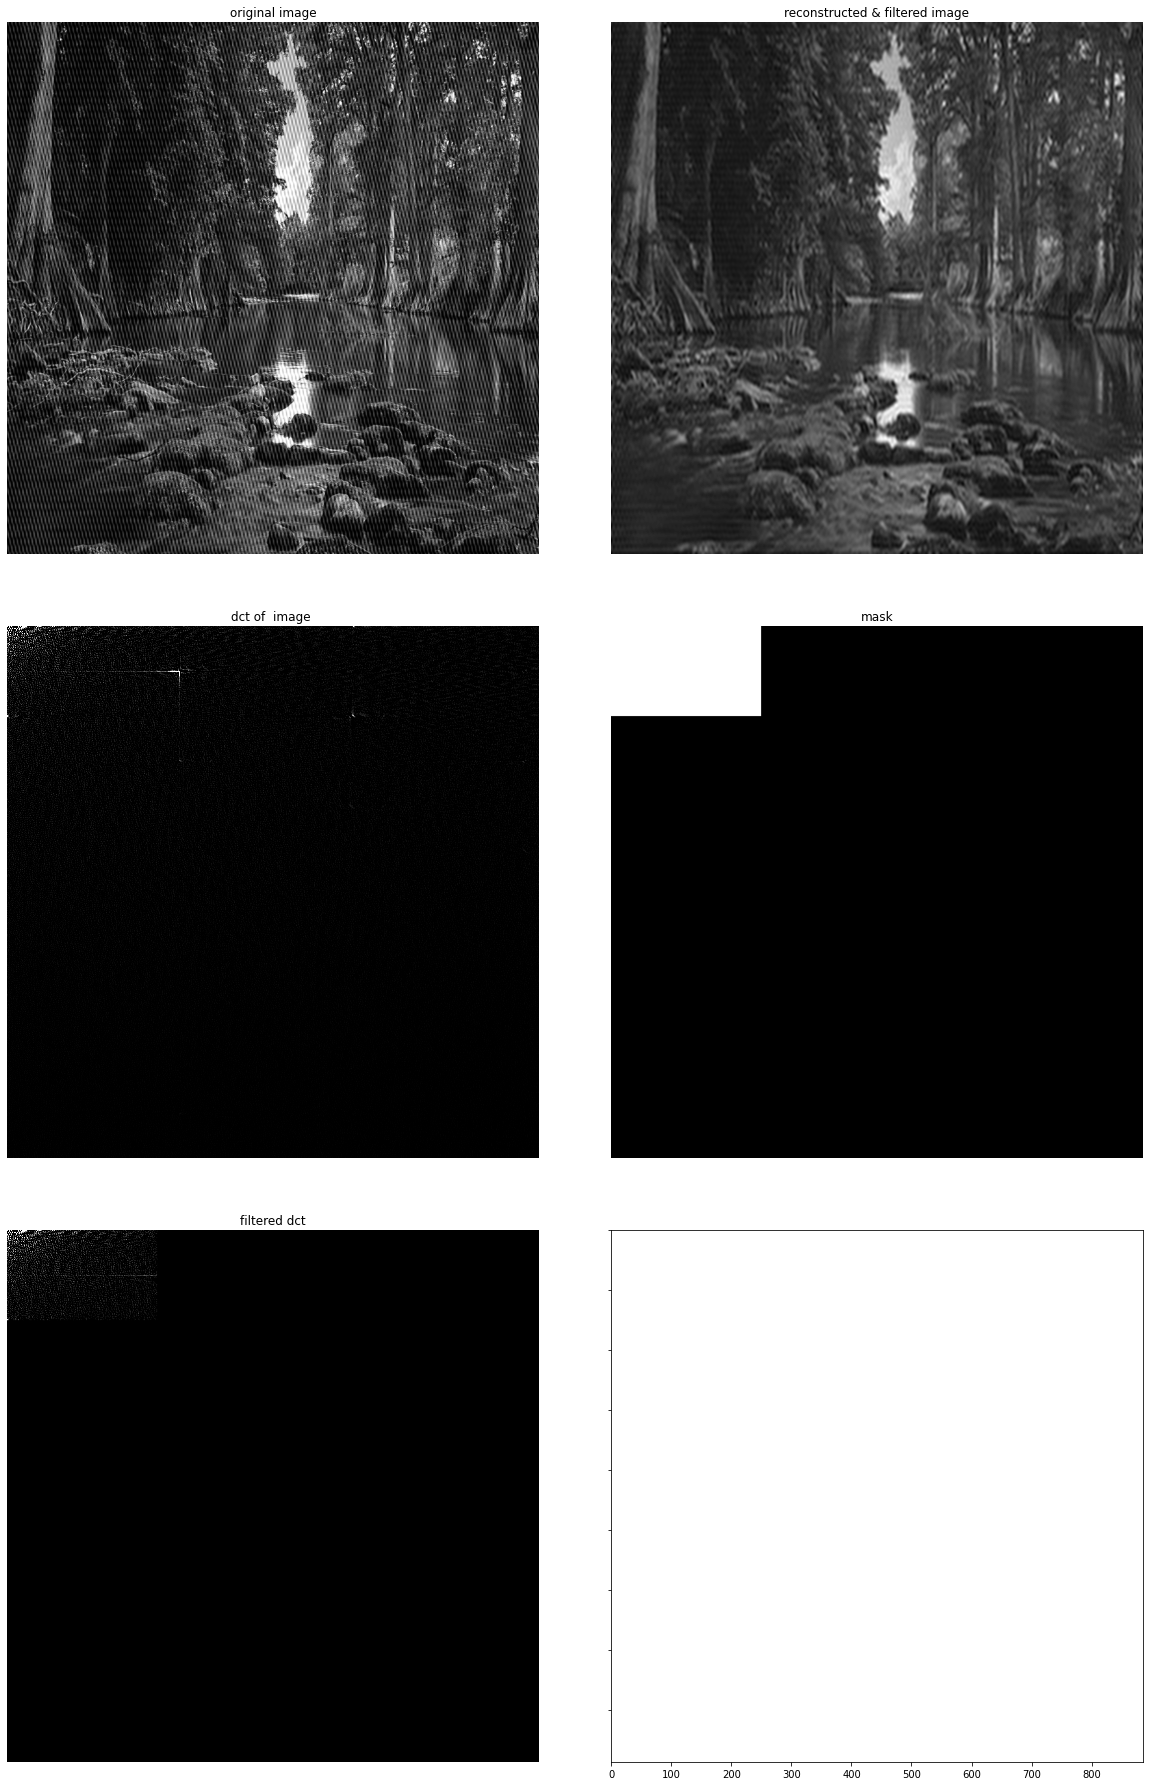

In [80]:
#Read image
img = cv2.imread('3.jpg',cv2.IMREAD_GRAYSCALE)
imgreal = cv2.imread('real_3.jpg',cv2.IMREAD_GRAYSCALE)
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
img2 = np.float32(img)
h = img.shape[0] +1 
w = img.shape[1] +1 
vis0 = np.zeros((h,w), np.float32)
vis0[:h-1, :w-1] = img
vis0[885 , 885] = vis0[884 , 884]
vis0[884 , 885] = vis0[884 , 884]
vis0[885 , 884] = vis0[884 , 884]
vis1 = cv2.dct(vis0)

#mask

mask = np.zeros((rows+1,cols+1),np.uint8)
mask[0 :  150   , 0: 250 ] = 1

dct_filter = vis1 * mask


reconstructed = cv2.idct(dct_filter)
''' 
برای مقایسه در قسمت ب سوال ، لازم است تا مجددا عکس نهایی پس از اعمال فیلتر را به اندازه اولیه آن
نگاشت کنیم  
'''
vis3 = np.zeros((h-1,w-1), np.float32)
vis3[:h-1, :w-1] = reconstructed[:h-1 , :w-1]



fig = plt.figure(figsize=(32,32))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(3, 2), 
                 axes_pad=1,  
                 )


grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('original image')
grid[0].axis('off')
grid[2].imshow(vis1, cmap='gray',vmin=0,vmax=255)
grid[2].set_title('dct of  image ')
grid[2].axis('off')
grid[3].imshow(mask , cmap = 'gray')
grid[3].set_title('mask')
grid[3].axis('off')
grid[1].imshow(reconstructed , cmap='gray')
grid[1].set_title('reconstructed & filtered image')
grid[1].axis('off')
grid[4].imshow(dct_filter , cmap='gray',vmin=0,vmax=255)
grid[4].set_title('filtered dct')
grid[4].axis('off')



DFT

(-0.5, 884.5, 884.5, -0.5)

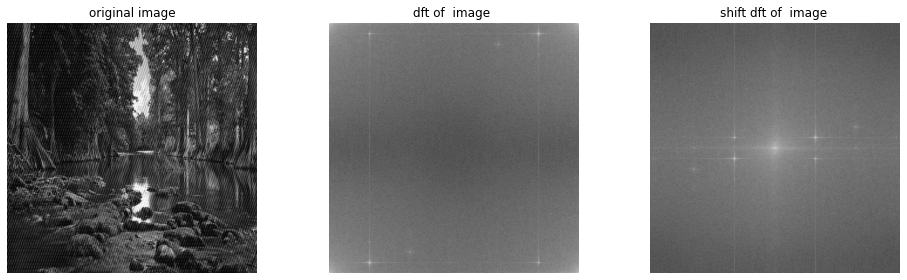

In [30]:
dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)

dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))
magnitude_spectrum2 = np.log(cv2.magnitude(dft[:,:,0],dft[:,:,1]))
fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, 3), 
                 axes_pad=1,  
                 )
grid[0].imshow(img,cmap='gray',vmin=0,vmax=255)
grid[0].set_title('original image')
grid[0].axis('off')
grid[1].imshow(magnitude_spectrum2, cmap='gray')
grid[1].set_title('dft of  image ')
grid[1].axis('off')
grid[2].imshow(magnitude_spectrum, cmap='gray')
grid[2].set_title('shift dft of  image ')
grid[2].axis('off')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log


(-0.5, 884.5, 884.5, -0.5)

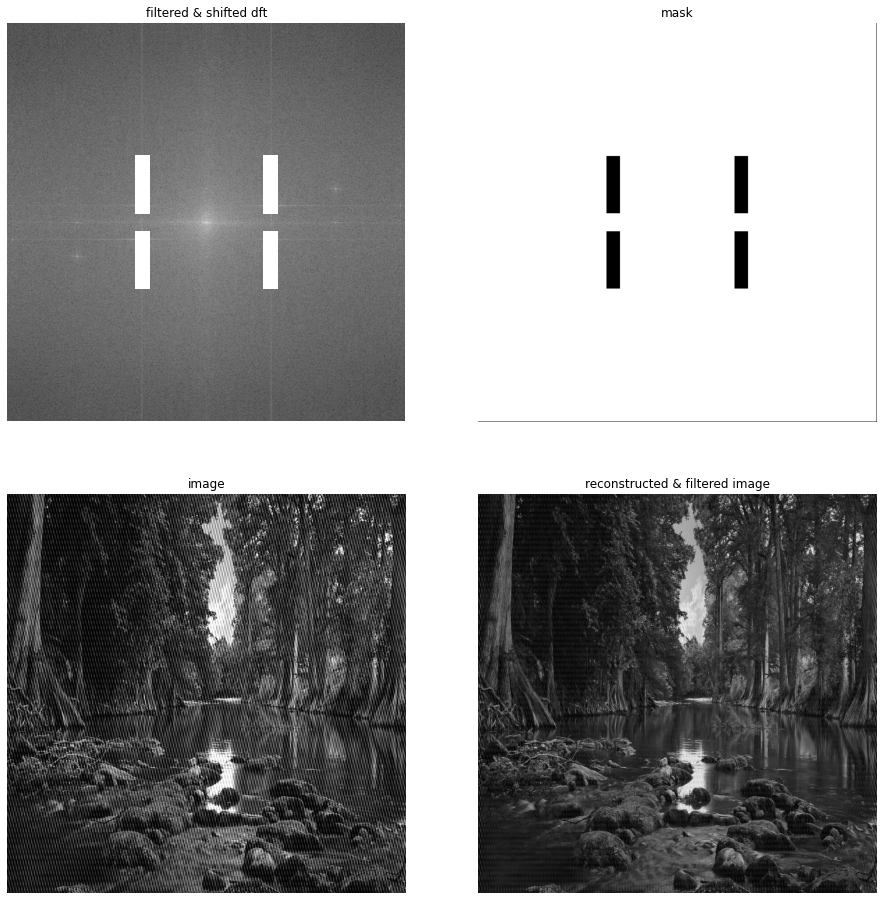

In [72]:
rows, cols = img.shape
crow,ccol = rows//2 , cols//2
a = rows//2 
b = cols //6 - 10
c = rows // 6
d = cols // 2
# create a mask first, center square is 1, remaining all zeros
mask2 = np.zeros((rows,cols,2),np.uint8)
mask2[crow-a :crow+a, ccol- b+10:ccol +b - 10] = 1
mask2[crow + c : crow +a , ccol -d  : ccol + d ] =1 
mask2[crow - a : crow -c   , ccol -d  : ccol + d ] =1 
mask2[crow - 20 : crow +20   , ccol -d  : ccol + d ] =1 
mask2[crow - a : crow + a , ccol -d  : ccol - b - 20] =1 
mask2[crow - a : crow + a , ccol +b + 20  : ccol + d] =1 


# apply mask 
fshift = dft_shift*mask2
''' 
حال معکوس شیفت یافته تصویر حاصل را به دست می آوریم
'''
f_ishift = np.fft.ifftshift(fshift)
''' 
حال معکوس دی اف تی  تصویر حاصل را به دست می آوریم
'''
img_back = cv2.idft(f_ishift)

f_ishift2= np.log(cv2.magnitude(fshift[:,:,0],fshift[:,:,1]))

img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])


fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(2, 2), 
                 axes_pad=1,  
                 )
grid[0].imshow(f_ishift2 , cmap='gray')
grid[0].set_title('filtered & shifted dft')
grid[0].axis('off')
grid[2].imshow(img, cmap='gray')
grid[2].set_title('image')
grid[2].axis('off')
grid[3].imshow(img_back, cmap='gray')
grid[3].set_title('reconstructed & filtered image')
grid[3].axis('off')
grid[1].imshow(mask2[:,:,0], cmap = 'gray')
grid[1].set_title('mask')
grid[1].axis('off')

(-0.5, 884.5, 884.5, -0.5)

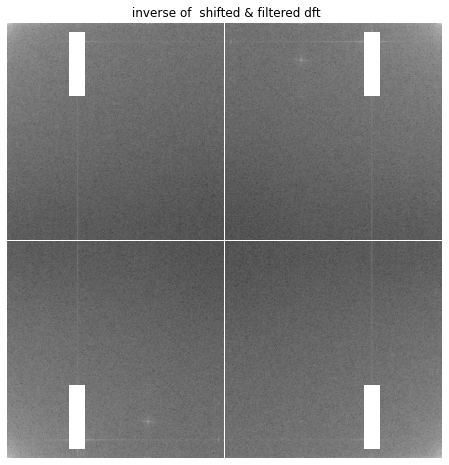

In [73]:
f_ishift5 = np.fft.ifftshift(f_ishift2)
fig = plt.figure(figsize=(8,8))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, 1), 
                 axes_pad=1,  
                 )
grid[0].imshow(f_ishift5 , cmap = 'gray')
grid[0].set_title(' inverse of  shifted & filtered dft')
grid[0].axis('off')


(-0.5, 884.5, 884.5, -0.5)

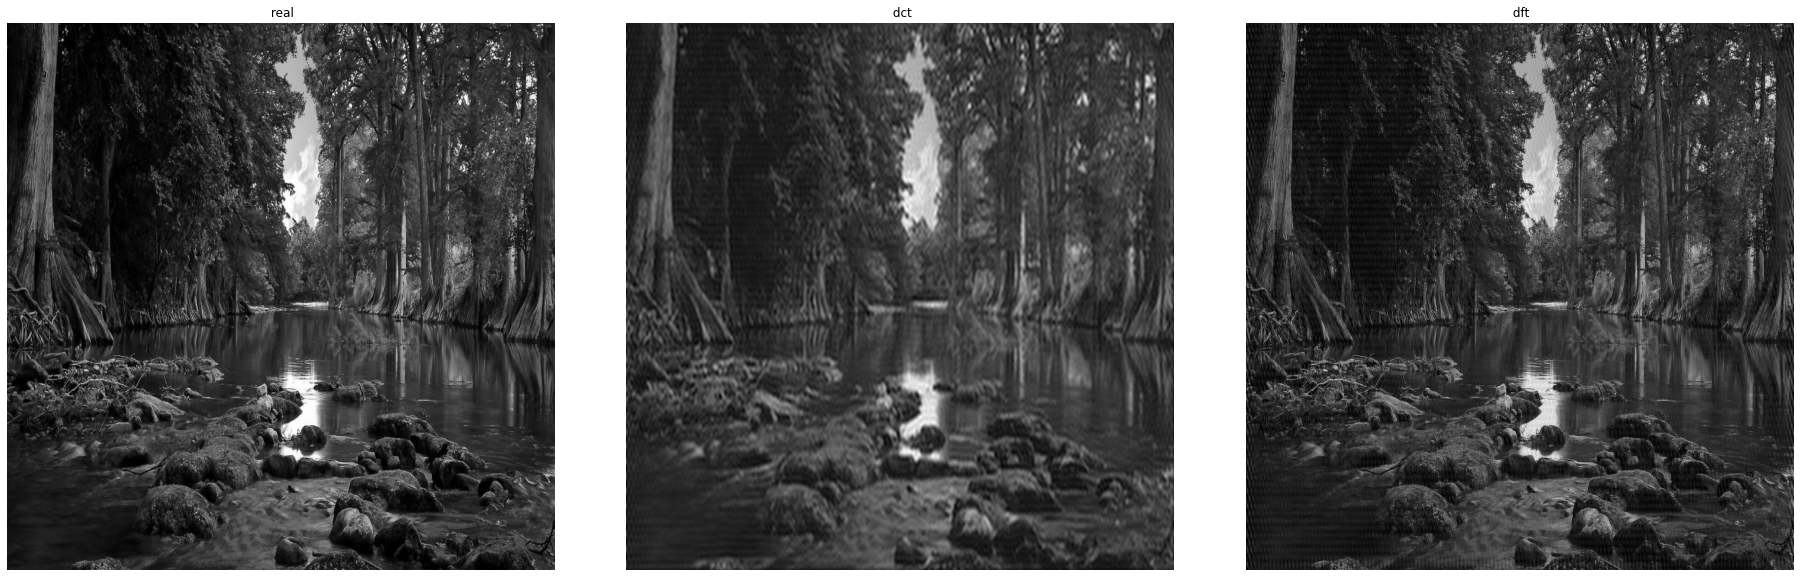

In [85]:
fig = plt.figure(figsize=(32,32))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(1, 3), 
                 axes_pad=1,  
                 )
grid[0].imshow(imgreal , cmap = 'gray')
grid[0].set_title(' real')
grid[0].axis('off')
grid[1].imshow(vis3 , cmap = 'gray')
grid[1].set_title(' dct')
grid[1].axis('off')
grid[2].imshow(img_back , cmap = 'gray')
grid[2].set_title(' dft')
grid[2].axis('off')

In [82]:
def PSNR(original, compressed):
	mse = np.mean((original - compressed) ** 2)
	if(mse == 0): # MSE is zero means no noise is present in the signal .
				# Therefore PSNR have no importance.
		return 100
	max_pixel = 255.0
	psnr = 20 * log10(max_pixel / sqrt(mse))
	return psnr

print('DFT' , PSNR( imgreal,img_back ))
print('DCT' , PSNR(imgreal ,vis3 ))

DFT -106.45303427194285
DCT 23.43655820704397


In [83]:
def MSE(orginal , compressed):
    mse = np.mean((orginal - compressed) ** 2)
    return mse

print('DFT', MSE(imgreal,img_back))

print('DCT', MSE(imgreal,vis3))

DFT 2873318600000000.0
DCT 294.73013


In [86]:
from skimage.metrics import structural_similarity as ssim
def compare(imageA, imageB):
   s = ssim(imageA, imageB)
   return s

print('DFT' ,compare(imgreal , img_back) )
print('DCT' ,compare(imgreal , vis3) )

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  This is separate from the ipykernel package so we can avoid doing imports until


DFT 4.888342133939366e-12
DCT 0.5831845413357537
